In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

In [4]:
# 1) internal planning  + explicit search
# 2) external planning - implicit search
# 3) external planning - explciit search

In [5]:
from analysis import get_stats

In [6]:
stats = get_stats("d100")

In [7]:
stats

[100,
 0,
 0,
 0,
 0,
 nan,
 Empty DataFrame
 Columns: [task_name, usd_cost, prompt_tokens, prompt_cached_tokens, prompt_non_cached_tokens, completion_tokens, total_tokens]
 Index: [],
 0,
 nan,
 Empty DataFrame
 Columns: [task_name, total_time_taken, total_proposal_time, total_evaluation_time, total_envstep_time]
 Index: [],
 nan,
 nan,
 Empty DataFrame
 Columns: [completion_iteration, completion_depth, max_depth, env_steps_taken]
 Index: []]

In [8]:
from analysis import get_stats

In [9]:
d5_stats = get_stats("d5")
d10_stats = get_stats("d10")
d20_stats = get_stats("d20")
d100_stats = get_stats("e100")

df = pd.DataFrame([d5_stats, d10_stats, d20_stats, d100_stats], 
                  columns=["mcts_depth", "successes", "failures", "errors", "total_usd", "avg_usd", "token_df", "total_time", "avg_time", "time_df", "avg_completion_iteration", "avg_completion_depth", "mcts_df"])
df.set_index("mcts_depth", inplace=True)
df["success_rate"] = df["successes"] / (df[["successes", "failures", "errors"]].sum(axis=1))
df = df[["success_rate", "total_usd", "avg_usd", "total_time", "avg_time", "avg_completion_iteration", "avg_completion_depth", "successes", "failures", "errors", "token_df", "time_df", "mcts_df"]]
df

/home/samuel/miniconda3/envs/py3117/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/samuel/miniconda3/envs/py3117/lib/python3.11/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


,success_rate,total_usd,avg_usd,total_time,avg_time,avg_completion_iteration,avg_completion_depth,successes,failures,errors,token_df,time_df,mcts_df
mcts_depth,,,,,,,,,,,,,
5,0.141509,4.861763,0.045866,40834.997811,385.235828,0.866667,4.266667,15,89,2,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
10,0.198113,6.413142,0.060501,57128.987742,538.952715,0.857143,5.238095,21,82,3,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
20,0.330189,9.009063,0.084991,91408.657527,862.345826,0.600000,7.314286,35,67,4,task_name usd_cost prompt_tokens pr...,task_name total_time_taken total_pro...,completion_iteration completion...
100,0.234694,24.347977,0.245939,151213.642555,1527.410531,0.000000,7.521739,23,71,4,task_name usd_cost prompt_tokens pro...,task_name total_time_taken total_prop...,completion_iteration completion...


In [10]:
df.loc[5].mcts_df["completion_depth"].value_counts().sort_index()

completion_depth
2.0    2
3.0    1
4.0    7
5.0    1
6.0    4
Name: count, dtype: int64

In [11]:
(df.loc[10].mcts_df["completion_depth"].value_counts().sort_index(),
df.loc[10].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 2.0     2
 3.0     2
 4.0     2
 5.0     7
 6.0     5
 8.0     1
 9.0     1
 10.0    1
 Name: count, dtype: int64,
 completion_iteration
 0.0    17
 2.0     2
 6.0     1
 8.0     1
 Name: count, dtype: int64)

In [13]:
(df.loc[20].mcts_df["completion_depth"].value_counts().sort_index(),
df.loc[20].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 2.0     3
 3.0     4
 4.0     4
 5.0     3
 6.0     2
 7.0     7
 8.0     5
 9.0     1
 10.0    1
 12.0    1
 16.0    1
 19.0    2
 21.0    1
 Name: count, dtype: int64,
 completion_iteration
 0.0    29
 2.0     3
 3.0     1
 4.0     1
 8.0     1
 Name: count, dtype: int64)

In [14]:
(df.loc[100].mcts_df["completion_depth"].value_counts().sort_index(),
df.loc[100].mcts_df["completion_iteration"].value_counts().sort_index())

(completion_depth
 3.0     2
 4.0     4
 5.0     2
 6.0     5
 7.0     1
 8.0     5
 10.0    3
 34.0    1
 Name: count, dtype: int64,
 completion_iteration
 0.0    23
 Name: count, dtype: int64)

In [15]:
df["successes"]

mcts_depth
5      15
10     21
20     35
100    23
Name: successes, dtype: int64

In [16]:
df[["success_rate", "successes", "failures", "errors"]]

,success_rate,successes,failures,errors
mcts_depth,,,,
5,0.141509,15,89,2
10,0.198113,21,82,3
20,0.330189,35,67,4
100,0.234694,23,71,4


In [17]:
df[["total_usd", "avg_usd"]]

,total_usd,avg_usd
mcts_depth,,
5,4.861763,0.045866
10,6.413142,0.060501
20,9.009063,0.084991
100,24.347977,0.245939


In [18]:
df[["total_time", "avg_time"]]

,total_time,avg_time
mcts_depth,,
5,40834.997811,385.235828
10,57128.987742,538.952715
20,91408.657527,862.345826
100,151213.642555,1527.410531


In [19]:
df.loc[5].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.21518763808320687)

In [20]:
df.loc[10].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.3818400765842733)

In [21]:
df.loc[20].token_df.sum()["prompt_cached_tokens"] / df.loc[20].token_df.sum()["total_tokens"]

np.float64(0.5618936986507974)

In [22]:
df.loc[100].token_df.sum()["prompt_cached_tokens"] / df.loc[100].token_df.sum()["total_tokens"]

np.float64(0.6384836215629782)

In [23]:
df.loc[20].mcts_df["completion_iteration"].value_counts().sort_values()

completion_iteration
4.0     1
8.0     1
3.0     1
2.0     3
0.0    29
Name: count, dtype: int64

In [24]:
df.loc[20].mcts_df["completion_iteration"] == 0

task_name
webarena.581     True
webarena.29     False
webarena.409    False
webarena.403     True
webarena.584    False
                ...  
webarena.646    False
webarena.648    False
webarena.621     True
webarena.624    False
webarena.725    False
Name: completion_iteration, Length: 106, dtype: bool

In [34]:

# plt.plot(x, y1, label="Series 1", linestyle='-', marker='o')
# plt.plot(x, y2, label="Series 2", linestyle='--', marker='s')

Text(0.5, 1.0, 'Tasks Completed V.S. Env Steps Taken')

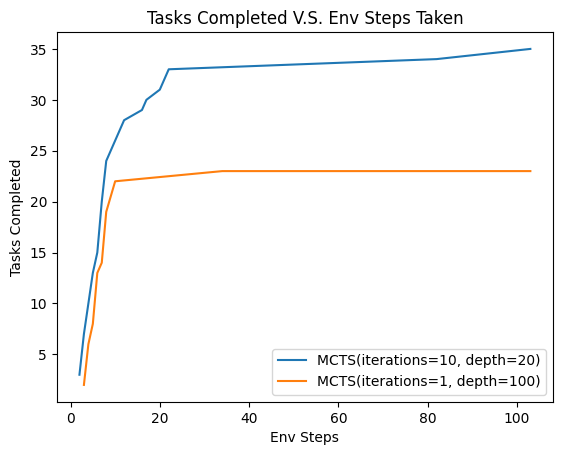

In [38]:
df.loc[20].mcts_df[
(df.loc[20].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum().plot(label="MCTS(iterations=10, depth=20)")

temp = df.loc[100].mcts_df[
(df.loc[100].mcts_df["completion_iteration"] >= 0)
].env_steps_taken.value_counts().sort_index().cumsum()
temp[103] = 23
temp.plot(label="MCTS(iterations=1, depth=100)")
plt.xlabel("Env Steps")
plt.ylabel("Tasks Completed")
plt.legend()
# plt.ylim(0, 1)
plt.title("Tasks Completed V.S. Env Steps Taken")

In [120]:
df.loc[20].mcts_df[
(df.loc[20].mcts_df["completion_iteration"] == 0)
]

,completion_iteration,completion_depth,max_depth
task_name,,,
webarena.581,0.0,8.0,8.0
webarena.403,0.0,8.0,8.0
webarena.605,0.0,2.0,2.0
webarena.582,0.0,4.0,4.0
webarena.596,0.0,4.0,4.0
webarena.609,0.0,16.0,16.0
webarena.399,0.0,6.0,6.0
webarena.607,0.0,3.0,3.0
webarena.610,0.0,9.0,9.0


Text(0.5, 1.0, 'Tasks Completed V.S. Depth')

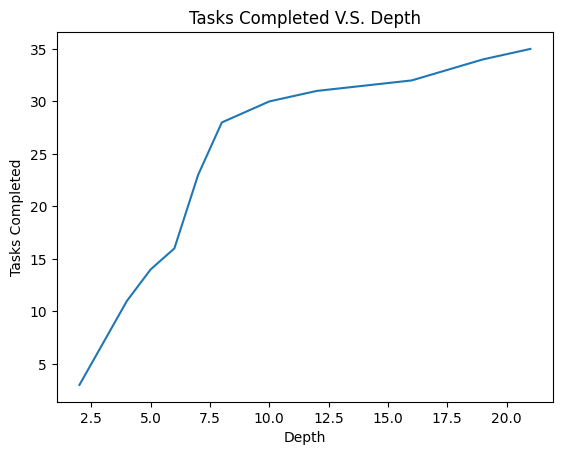

In [82]:
df.loc[20].mcts_df.completion_depth.value_counts().sort_index().cumsum().plot()
plt.xlabel("Depth")
plt.ylabel("Tasks Completed")
# plt.ylim(0, 1)
plt.title("Tasks Completed V.S. Depth")

In [ ]:
import numpy as np

tag = "d5"

task_iteration_stats_rows = []
results_dir = "./results"
exp_names = os.listdir(results_dir)
for exp_name in exp_names:
  if tag in exp_name:

    exp_path = os.path.join(results_dir, exp_name)
    task_names = os.listdir(exp_path)

    for task_name in task_names:
      if "webarena" in task_name:
        task_path = os.path.join(results_dir, exp_name, task_name)
        if os.path.exists(os.path.join(task_path, "result.pkl")):
          mcts_result = pickle.load(open(os.path.join(task_path, "result.pkl"), "rb"))
          if mcts_result.cum_reward >= 100: # task successfully completed
            completion_iteration = find_completion_iteration(mcts_result)
            task_iteration_stats_rows.append([task_name, completion_iteration])
          else:
            task_iteration_stats_rows.append([task_name, np.nan])
        else:
          task_iteration_stats_rows.append([task_name, np.nan])

/tmp/ipykernel_2704942/507405824.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


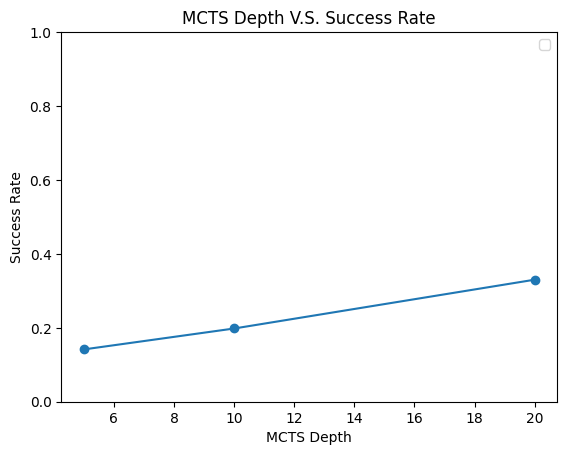

In [13]:
plt.plot(df.index, df["success_rate"], marker="o")
plt.xlabel("MCTS Depth")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.title("MCTS Depth V.S. Success Rate")
plt.legend()
plt.show()